cost after iteration 0: 0.7368485967804637
cost after iteration 1000: 0.6771399580072878
cost after iteration 2000: 0.6700328157136244
cost after iteration 3000: 0.6560286195416574
cost after iteration 4000: 0.630671621972103
cost after iteration 5000: 0.5877874061480515
cost after iteration 6000: 0.5221668644447744
cost after iteration 7000: 0.4427584397247153
cost after iteration 8000: 0.3523693928802174
cost after iteration 9000: 0.27089429843099083
cost after iteration 10000: 0.2046082985188095
cost after iteration 11000: 0.15946935053718067
cost after iteration 12000: 0.12954661317605
cost after iteration 13000: 0.10807825598020818
cost after iteration 14000: 0.09241594012258347


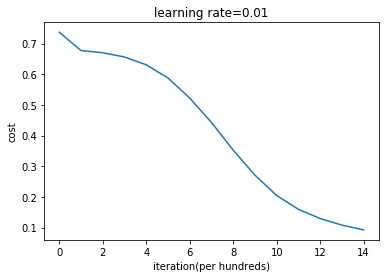

accuracy:0.993333333333
accuracy:0.93
[[1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0
  1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0
  0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1
  1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0
  1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1
  0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1
  1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1
  0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1
  1 0 1 0]]
[[1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0
  1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
  1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0]]


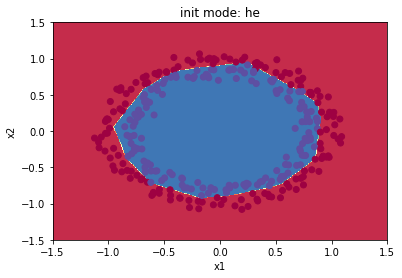

In [37]:
import sklearn
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def load_data():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=0.05)
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=0.05)
#     plt.scatter(train_X[:,0],train_X[:,1],c=train_Y,s=40,cmap=plt.cm.Spectral)
#     plt.show()

#     print(test_Y)
    train_X = train_X.T
    train_Y = train_Y.reshape((1,train_Y.shape[0])) # 一维变二维
    test_X = test_X.T
    test_Y = test_Y.reshape((1,test_Y.shape[0]))
#     print(test_Y)
    return train_X, train_Y, test_X, test_Y

def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def compute_loss(a3, Y):
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(a3),Y)+np.multiply(-np.log(1-a3),1-Y)
    loss = 1./m*np.nansum(logprobs)
    return loss

def forward_propagation(X,parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    z1 = np.dot(W1,X)+b1
    a1 = relu(z1)
    z2 = np.dot(W2,a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3,a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1,a1,W1,b1,z2,a2,W2,b2,z3,a3,W3,b3)
    return a3, cache

def backward_propagation(X,Y,cache):
    m = X.shape[1]
    (z1,a1,W1,b1,z2,a2,W2,b2,z3,a3,W3,b3) = cache
    
    dz3 = 1./m*(a3-Y)
    dW3 = np.dot(dz3,a2.T)
    db3 = np.sum(dz3, axis=1,keepdims=True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2,np.int64(a2>0))
    dW2 = np.dot(dz2,a1.T)
    db2 = np.sum(dz2,axis=1,keepdims=True)
    
    da1 = np.dot(W2.T,dz2)
    dz1 = np.multiply(da1,np.int64(a1>0))
    dW1 = np.dot(dz1,X.T)
    db1 = np.sum(dz1,axis=1,keepdims=True)
    
    grads = {"dz3":dz3,"dW3":dW3,"db3":db3,
            "da2":da2,"dz2":dz2,"dW2":dW2,"db2":db2,
            "da1":da1,"dz1":dz1,"dW1":dW1,"db1":db1}
    return grads

def update_params(params, grads, learning_rate):
    L = len(params)//2
    for k in range(L):
        params["W"+str(k+1)]=params["W"+str(k+1)]-learning_rate*grads["dW"+str(k+1)]
        params["b"+str(k+1)]=params["b"+str(k+1)]-learning_rate*grads["db"+str(k+1)]
    return params

def predict(X,y,params):
    m = X.shape[1]
    p = np.zeros((1,m),dtype=np.int)
    a3,caches = forward_propagation(X, params)
    for i in range(0,a3.shape[1]):
        if a3[0,i]>0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    print("accuracy:"+str(np.mean((p[0,:]==y[0,:]))))
    return p

def plot_decision_boundary(model, X, y):
    x_min,x_max = X[0,:].min()-1,X[0,:].max()+1
    y_min,y_max = X[1,:].min()-1,X[1,:].max()+1
    h = 0.01
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    Z = model(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0,:],X[1,:],c=y,cmap=plt.cm.Spectral)
    plt.show()
    
def predict_dec(params, X):
    a3, cache = forward_propagation(X, params)
    predictions = (a3>0.5)
    return predictions

def model(X,Y,learning_rate,num_iter,print_cost,init_mode):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]
    if init_mode=='zero':
        params = init_params_zeros(layers_dims)
    elif init_mode=='random':
        params = init_params_random(layers_dims)
    elif init_mode=='he':
        params = init_params_he(layers_dims)
        
    for i in range(0, num_iter):
        a3,cache = forward_propagation(X,params)
        cost = compute_loss(a3, Y)
        grads = backward_propagation(X,Y, cache)
        params = update_params(params,grads,learning_rate)
        if print_cost and i%1000==0:
            print("cost after iteration {0}: {1}".format(i,cost))
            costs.append(cost)
    
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iteration(per hundreds)')
    plt.title('learning rate='+str(learning_rate))
    plt.show()
    return params


def init_params_zeros(layers_dims):
    params = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        params['W'+str(l)]=np.zeros((layers_dims[l],layers_dims[l-1]))
        params['b'+str(l)]=np.zeros((layers_dims[l],1))
    return params

def init_params_random(layers_dims):
    np.random.seed(3)
    params = {}
    L = len(layers_dims)
    
    for l in range(1,L):
        params['W'+str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*10
        params['b'+str(l)] = np.zeros((layers_dims[l],1))
    return params

def init_params_he(layers_dims):
    L = len(layers_dims)
    params = {}
    for l in range(1,L):
        params['W'+str(l)]=np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2./layers_dims[l-1])
        params['b'+str(l)]=np.zeros((layers_dims[l],1))
    return params
    
if __name__ == '__main__':
    train_X, train_Y, test_X, test_Y = load_data()
    # zero random he
    init_mode = 'he'
    params = model(train_X,train_Y,0.01,15000,True,init_mode)
    prediction_train = predict(train_X,train_Y,params)
    prediction_test = predict(test_X,test_Y,params)
    print(prediction_train)
    print(prediction_test)
    plt.title('init mode: ' + init_mode)
    axes = plt.gca()
    axes.set_xlim([-1.5,1.5])
    axes.set_ylim([-1.5,1.5])
    plot_decision_boundary(lambda x:predict_dec(params, x.T), train_X, train_Y)